In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
import sys

# 获取当前文件所在的文件夹路径
if "__file__" in globals():
    # 获取__file__变量的值
    file_path = __file__
    # 获取当前文件所在的文件夹路径
    dir_now = os.path.dirname(file_path)
else:
    # 获取当前工作目录
    dir_now = os.getcwd()
sys.path.append(os.path.join(dir_now, '../../'))
sys.path.append(os.path.join(dir_now, '../'))
sys.path.append(os.path.join(dir_now, '../../../../../../csi_transformer/src'))

from NNutils import *
from amm_methods import *
import ctdirs_utils as cu

marker_list = ["s", "o", "v", "*", "1", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d",]
colors_list = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2',
              '#8983BF', '#C76DA2', '#FFBE7A', '#82B0D2', '#BEB8DC',
              '#E7DAD2', '#999999']
cmap_list = ['Blues', 'Reds', 'Greens', 'Purples', 'Greys', 'Oranges']
cmap_max_list = [(0.05636293733179547, 0.34963475586312953, 0.6367550941945406, 1.0), 
                 (0.4725720876585929, 0.016608996539792385, 0.059838523644752006, 1.0), 
                 (0.034986543637062675, 0.45743944636678197, 0.19753940792003075, 1.0), 
                 (0.2703114186851211, 0.043183391003460206, 0.5101268742791234, 1.0), 
                    (0.4, 0.4, 0.4, 1.0),
                 (0.5412226066897348, 0.16955017301038064, 0.014579008073817762, 1.0)]


/shared/conda/envs/bolt/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def nmse(A, B):
    mse = ((A - B) ** 2).mean()
    max_value = max(np.amax(A), np.amax(B))
    min_value = min(np.amin(A), np.amin(B))
    return mse / ((max_value - min_value) ** 2)

In [3]:
etl1_exact = {"linear_name": "etl1", "AMM_method": "Exact", "n_train_sam":1000, "n_test_sam":1000,
     "fb":256, "cb":0, "ct":0}#, "test_idx":0, "skip_relu":False, 'AMM_train_on_the_spot':False,
         #"quantize_lut": True, "nbits":16, "upcast_every":16, "lut_work_const":-1}
res_etl1_exact = cu.amm_res_read(etl1_exact)
# 重置为二维矩阵
res_etl1_exact = res_etl1_exact.reshape(-1, res_etl1_exact.shape[-1])
print(res_etl1_exact.shape)

(1024000, 512)


In [4]:
AMM_mad_C64K512_nb16_ucm1_lwcm32 = {"linear_name": "etl1", "AMM_method": "Mithral", "n_train_sam":1000, "n_test_sam":1000,
        "fb":256, "cb":64, "ct":512, "quantize_lut": True, "nbits":16, "upcast_every":-1, "lut_work_const":-32}
res_AMM_mad_C64K512_nb16_ucm1_lwcm32 = cu.amm_res_read(AMM_mad_C64K512_nb16_ucm1_lwcm32)

In [5]:
def amm_read_multiple(linear_name, AMM_method, n_train_sam, cb, ct_list, quantize_lut, nbits, upcast_every, lut_work_const):
    res_list = []
    for ct in ct_list:
        AMM_dict = {"linear_name": linear_name, "AMM_method": AMM_method, "n_train_sam":n_train_sam, "n_test_sam":1000,
                    "fb":256, "cb":cb, "ct":ct, "quantize_lut": quantize_lut, "nbits":nbits, "upcast_every":upcast_every, "lut_work_const":lut_work_const}
        res = cu.amm_res_read(AMM_dict)
        # 重置为二维矩阵
        res = res.reshape(-1, res.shape[-1])
        res_list.append(res)
    return res_list


In [6]:
ct_list = [128, 256, 512, 1024, 2048]
len_ct_list = len(ct_list)

In [7]:
res_etl1_mad_C64_list = amm_read_multiple("etl1", "Mithral", 1000, 64, ct_list, True, 16, -1, -32)

In [16]:
# 求Exact矩阵中数据的最大值和最小值
exact_max = np.amax(res_etl1_exact)
exact_min = np.amin(res_etl1_exact)
print("Exact矩阵中数据的最大值和最小值分别为：", exact_max, exact_min)
print("Exact矩阵中数据的动态范围为：", exact_max - exact_min)

Exact矩阵中数据的最大值和最小值分别为： 1.8738081 -3.050548
Exact矩阵中数据的动态范围为： 4.9243565


In [10]:
for i, res in enumerate(res_etl1_mad_C64_list):
    print("ct = ", ct_list[i], ", nmse = ", nmse(res, res_etl1_exact))

ct =  128 , nmse =  0.00017754825637976437
ct =  256 , nmse =  0.0002521494868837779
ct =  512 , nmse =  0.000431272609517088
ct =  1024 , nmse =  0.0005867966103789615
ct =  2048 , nmse =  0.0008243497191838559


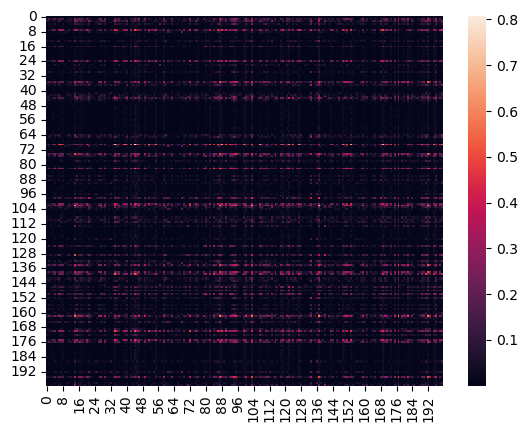

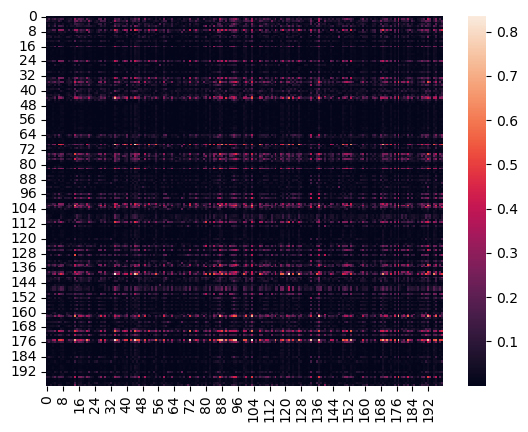

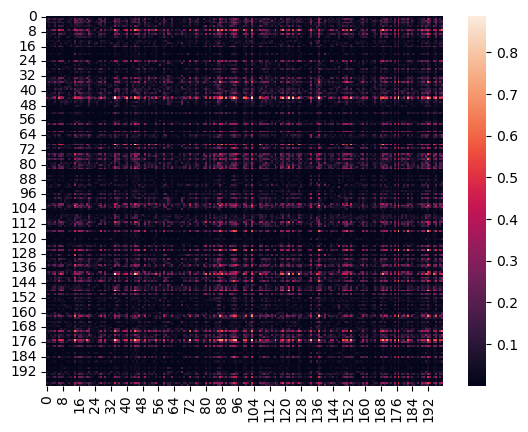

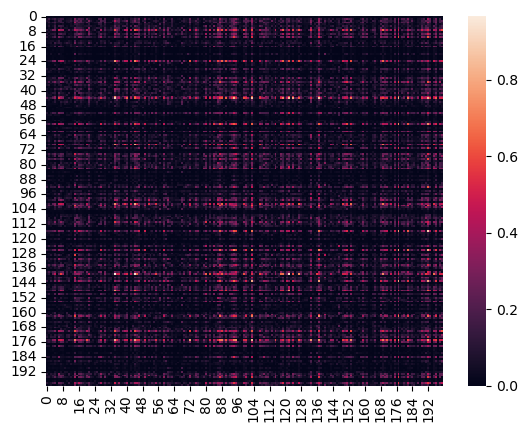

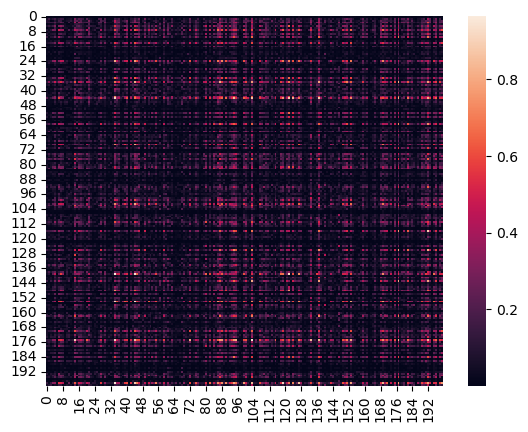

In [12]:
for i, res in enumerate(res_etl1_mad_C64_list):
    # 求res - res_etl1_exact的绝对值
    diff = np.abs(res - res_etl1_exact)
    plt.figure()
    sns.heatmap(diff[:200,:200])#, cmap=cmap_list[0], vmin=-0.1, vmax=0.1)

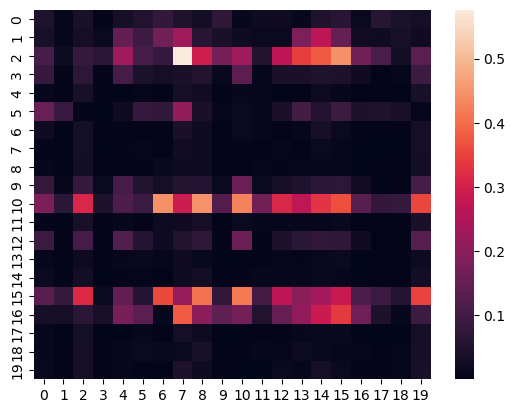

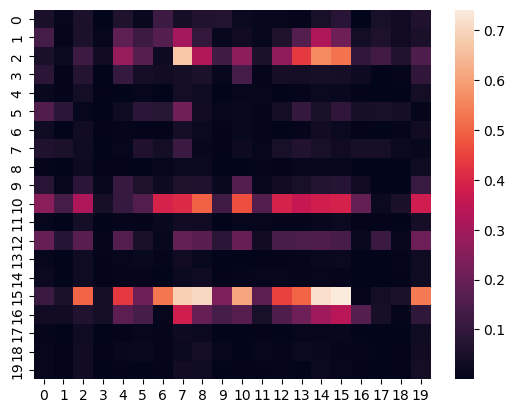

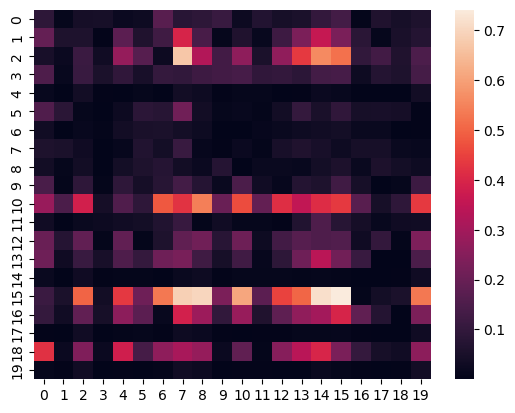

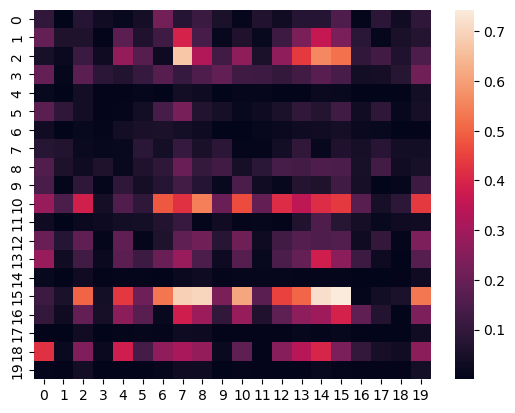

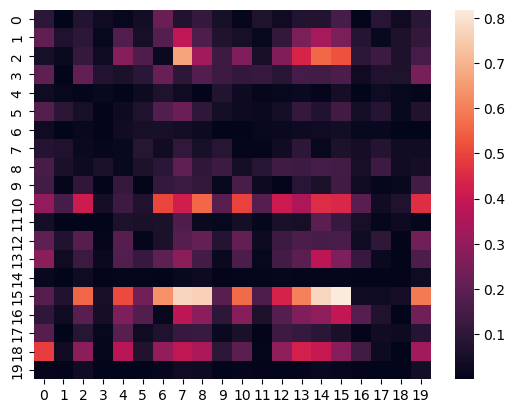

In [13]:
for i, res in enumerate(res_etl1_mad_C64_list):
    # 求res - res_etl1_exact的绝对值
    diff = np.abs(res - res_etl1_exact)
    plt.figure()
    sns.heatmap(diff[160:180,80:100])#, cmap=cmap_list[0], vmin=-0.1, vmax=0.1)